In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib.colors as colors
#plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
c = const.physical_constants['speed of light in vacuum'][0]
e = const.physical_constants['elementary charge'][0]

pathPre = 'C:/Users/rober/Documents/Research/USPAS2020/'

In [2]:
den = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
gradient = np.zeros(len(den))

In [3]:
def alpha_colormap(cmap, cutoff, flip=True):
    N = cmap.N
    cmapt = cmap(np.arange(N))
    alpha = np.ones(N)
    if flip:
        temp = alpha[:int(cutoff*N)]
        M = len(temp)
        alpha[:int(cutoff*N)] = np.linspace(0, 1, M)
    else:
        alpha[int((1-cutoff)*N):] = 0.0
    cmapt[:, -1] = alpha
    cmapt = colors.ListedColormap(cmapt)
    return cmapt

def plot_sim():
    N = len(den)
    plt.figure(figsize=(20,12), dpi=100)
    gs = gridspec.GridSpec(4, N)
    
    for j in range(N):
        path = pathPre + '%0.0fe16/' % (den[j]*10)
        if den[j] > 0.95:
            path = pathPre + '%0.1fe17/' % (den[j])
        data = np.load(path + 'AcceleratingGradient.npy', allow_pickle=True).item()
        density = np.load(path + 'DensitySlice.npy', allow_pickle=True).item()
        
        # Load in plasma density
        ind = 5
        rhoXY = -np.transpose(density['rhoP'][ind]/e/1e6)+1000 #+2 makes it greater than 0 for log scale
        x = density['xfield']
        y = density['yfield']
        
        #Load in the beam densities
        rhoBXY = -np.transpose(density['rhoB'][ind]/e/1e6)
        
        ax1 = plt.subplot(gs[0, j])
        plt.plot(data['x']*1e6, data['energy']/1e3)
        if j == 0:
            plt.ylabel('Energy (GeV)')
        plt.xlabel(r'z ($\mu m$)')
        plt.title(r'%0.1fe17 $\mathrm{cm^{-3}}$' % (den[j]))
        plt.twinx()
        plt.plot(data['x'][1:]*1e6, data['gradient']/1e3, 'm')
        if j == N-1:
            plt.ylabel('Gradient (GeV/m)')
        
        plt.subplot(gs[1, j])
        #for k in range(len(data['x'])):
        k = 5
        plt.plot(data['xfield']*1e6, data['field'][k, :]/1e9, label=('%0.2f' % (data['x'][k]*1e6)))
        if j == 0:
            plt.ylabel('Field (GeV/m)')
        plt.xlabel(r'z ($\mu m$)')

        plt.subplot(gs[2, j])
        plt.plot(data['x']*1e6, data['gamma_rms'], 'g')
        plt.xlabel(r'z ($\mu m$)')
        if j == 0:
            plt.ylabel('Energy spread (%)')
        
        ax = plt.subplot(gs[3, j])
        ax.imshow(rhoXY, interpolation='gaussian', aspect='auto', extent=[-150, 150, -150, 150],
           norm=colors.LogNorm(vmin=5e15, vmax=5e18), cmap='inferno')
        cmapW = alpha_colormap(plt.cm.get_cmap('rainbow'), 0.1, True)
        ax.imshow(rhoBXY, interpolation='gaussian', aspect='auto', extent=[-150, 150, -150, 150], cmap=cmapW)
        plt.xlabel(r'z ($\mu m$)')
        if j == 0:
            plt.ylabel(r'x ($\mu m$)')
        plt.tight_layout()
        
    plt.show()

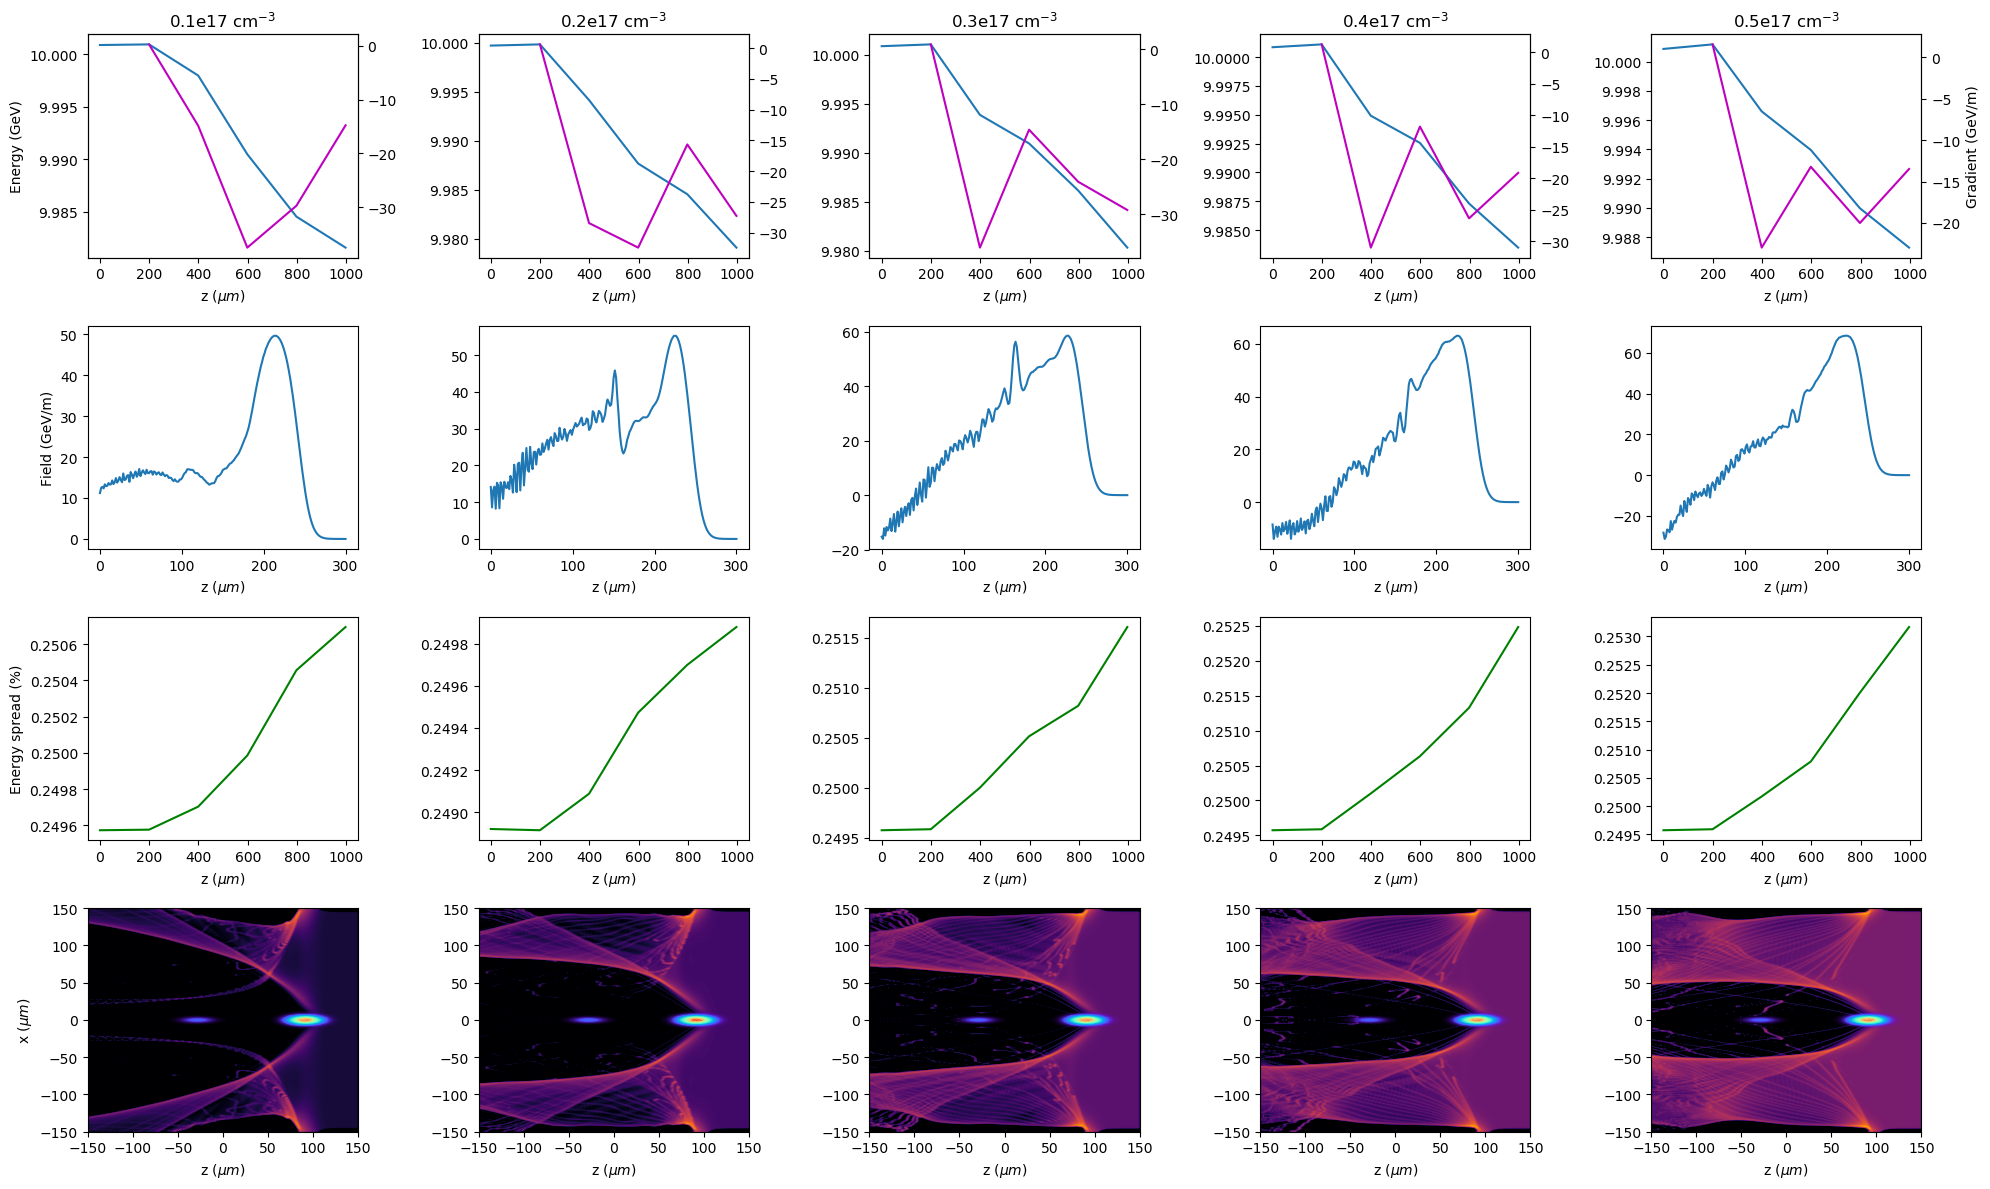

In [4]:
den = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
plot_sim()

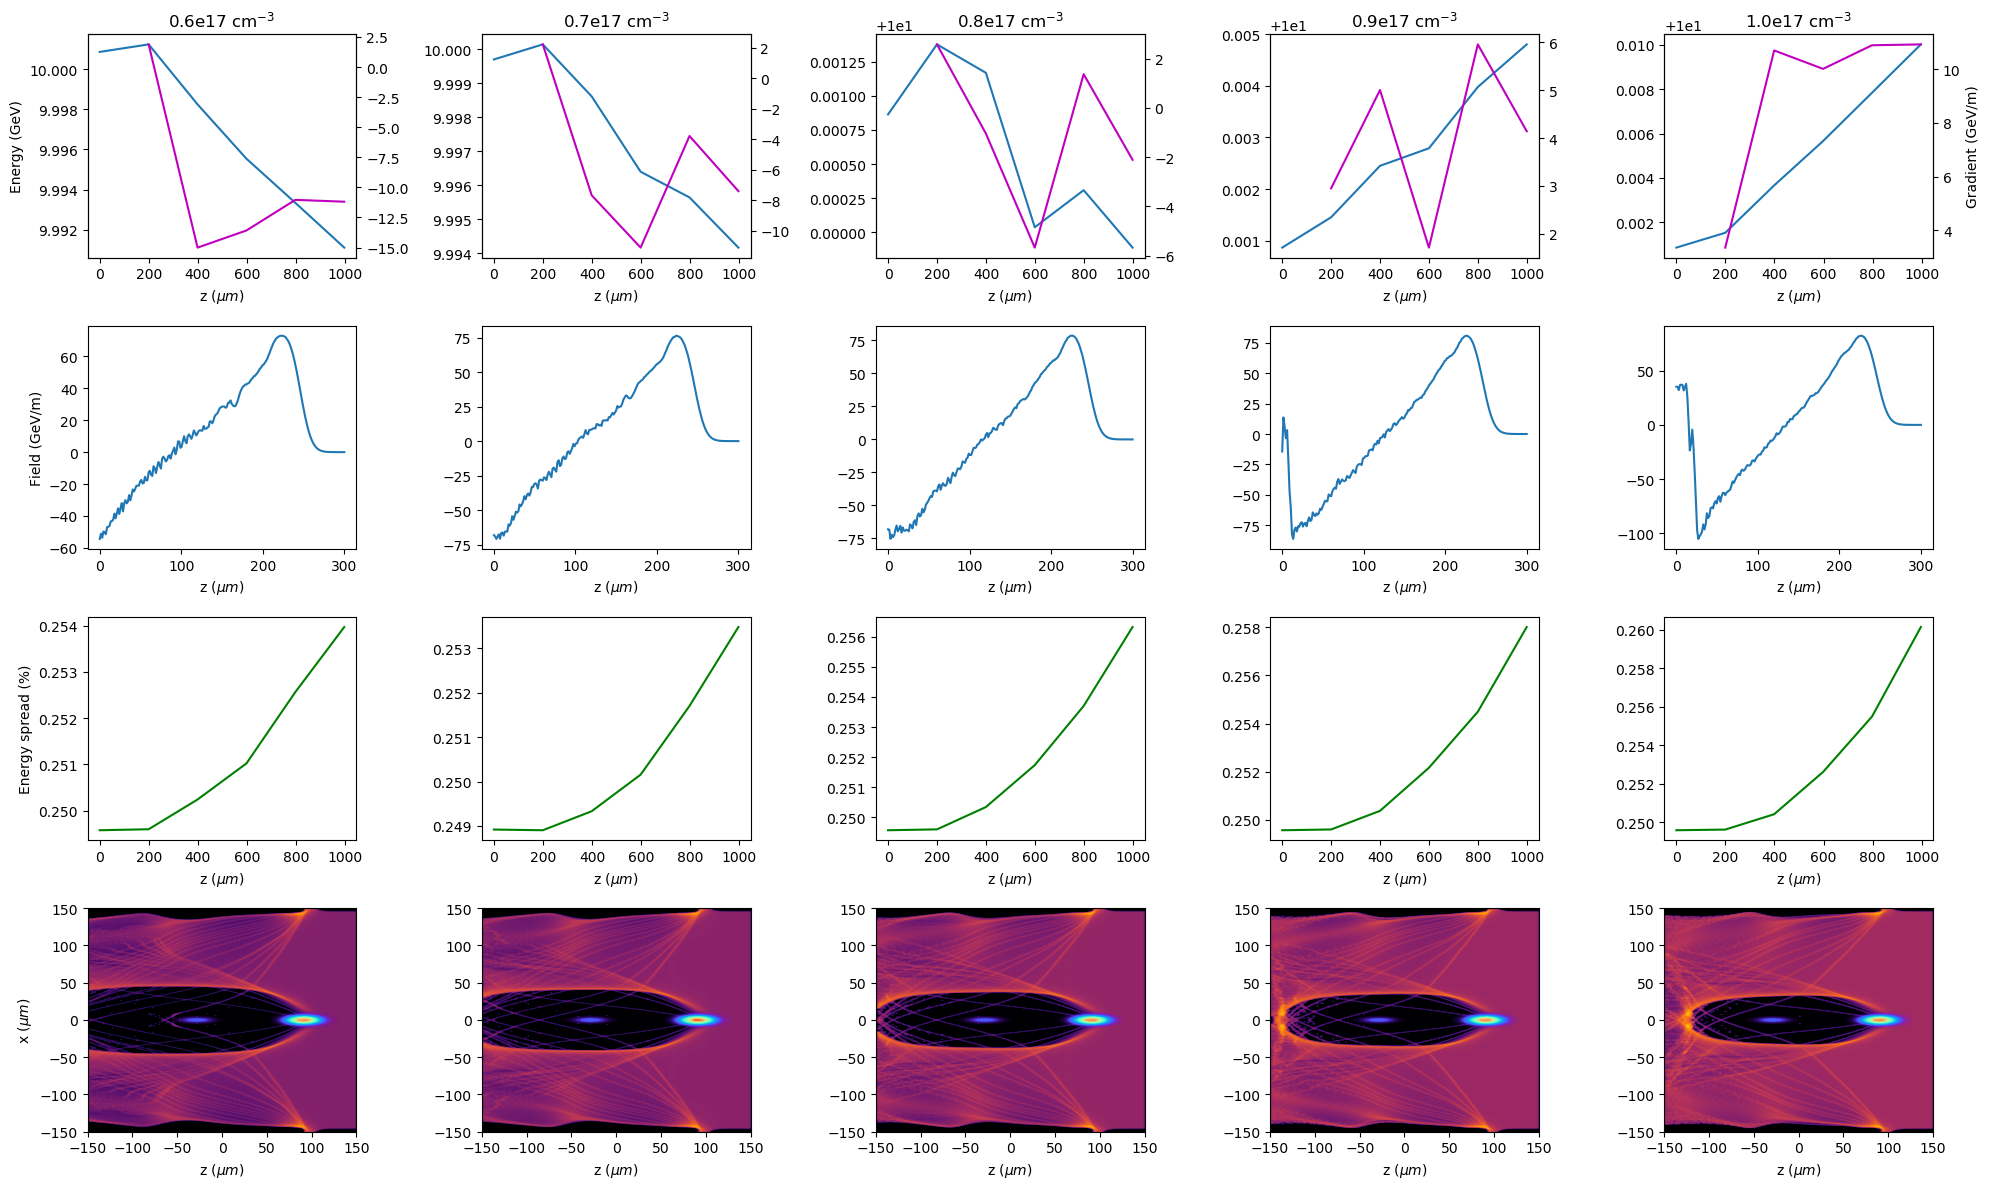

In [5]:
den = np.array([0.6, 0.7, 0.8, 0.9, 1.0])
plot_sim()

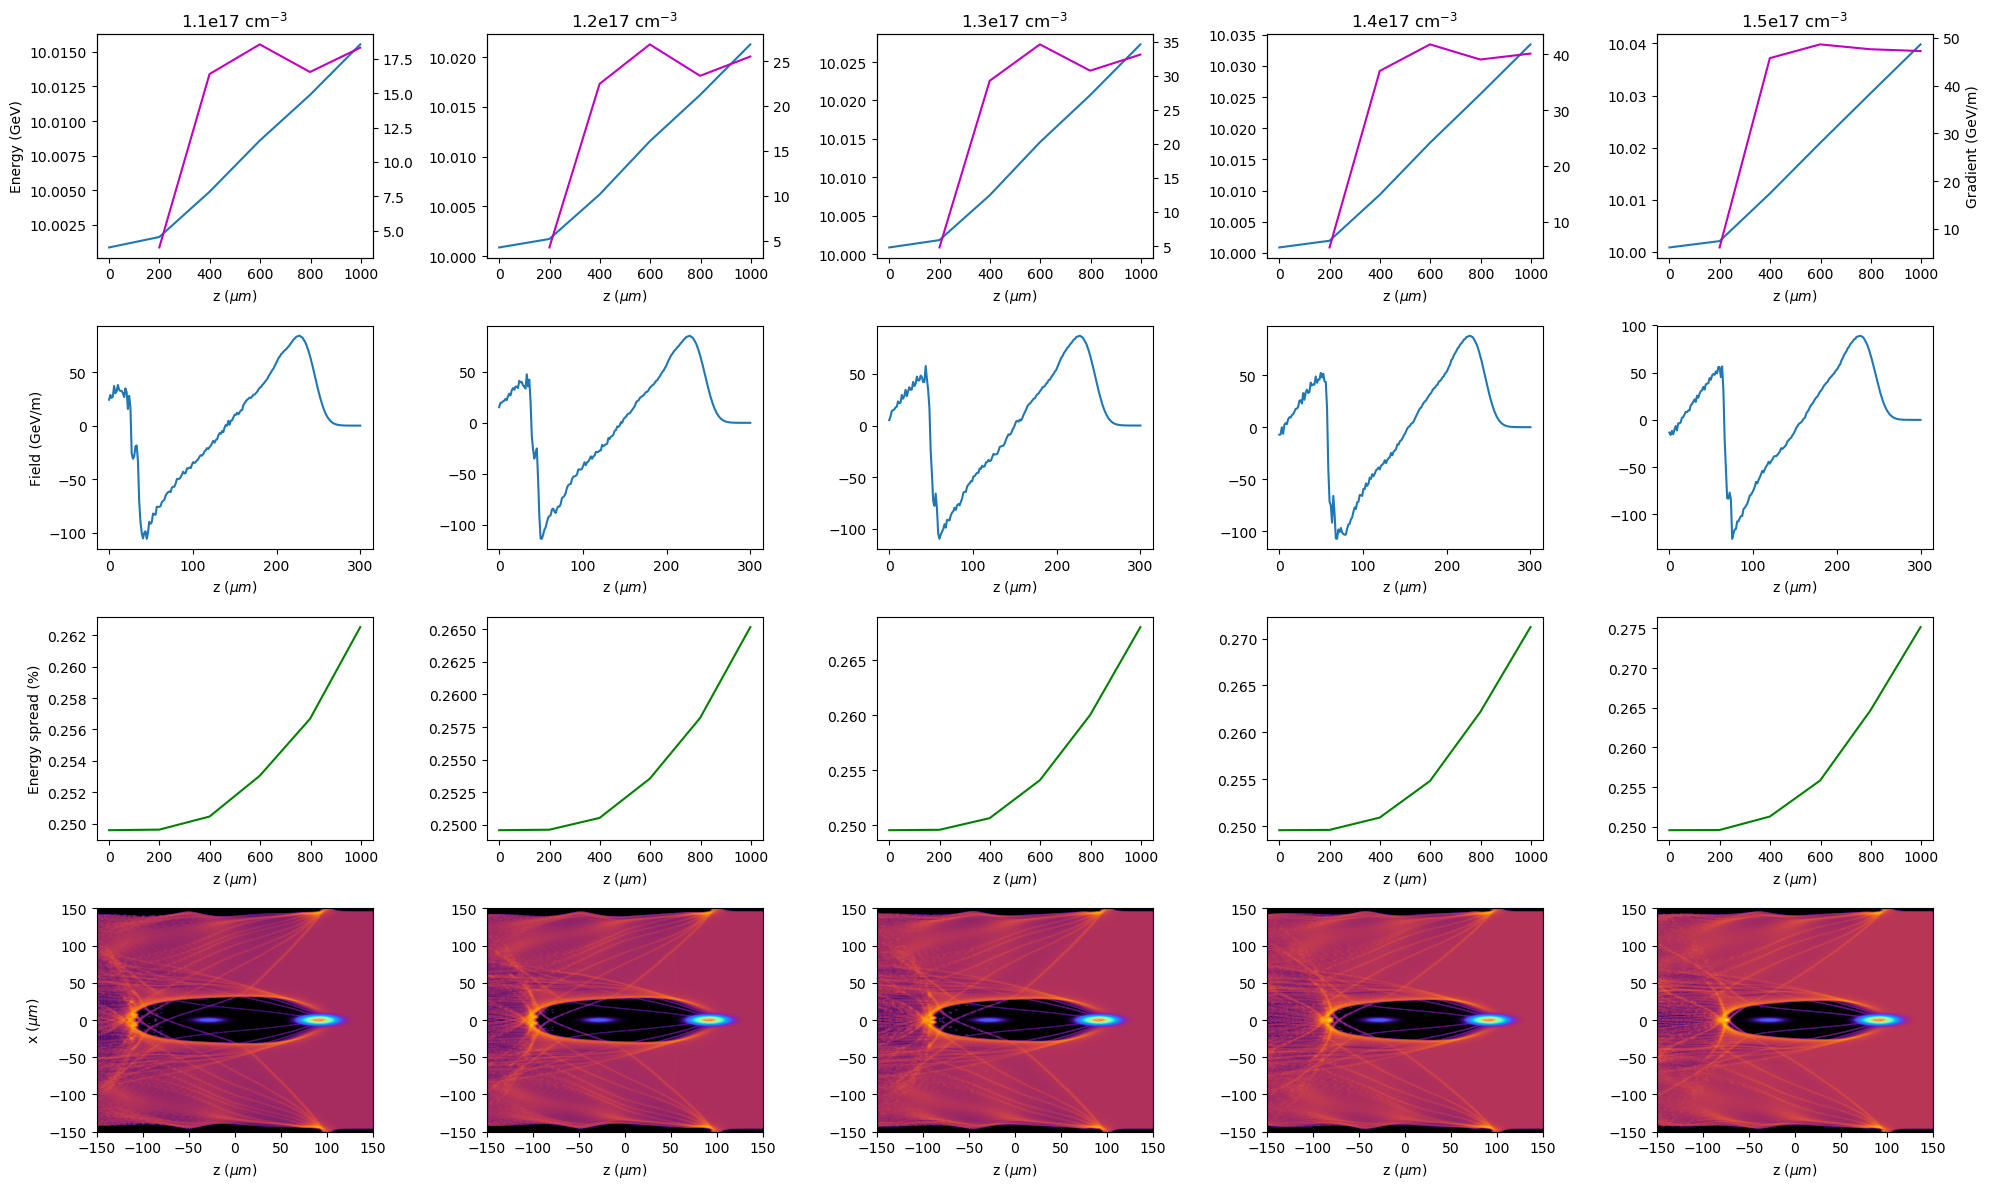

In [6]:
den = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
plot_sim()

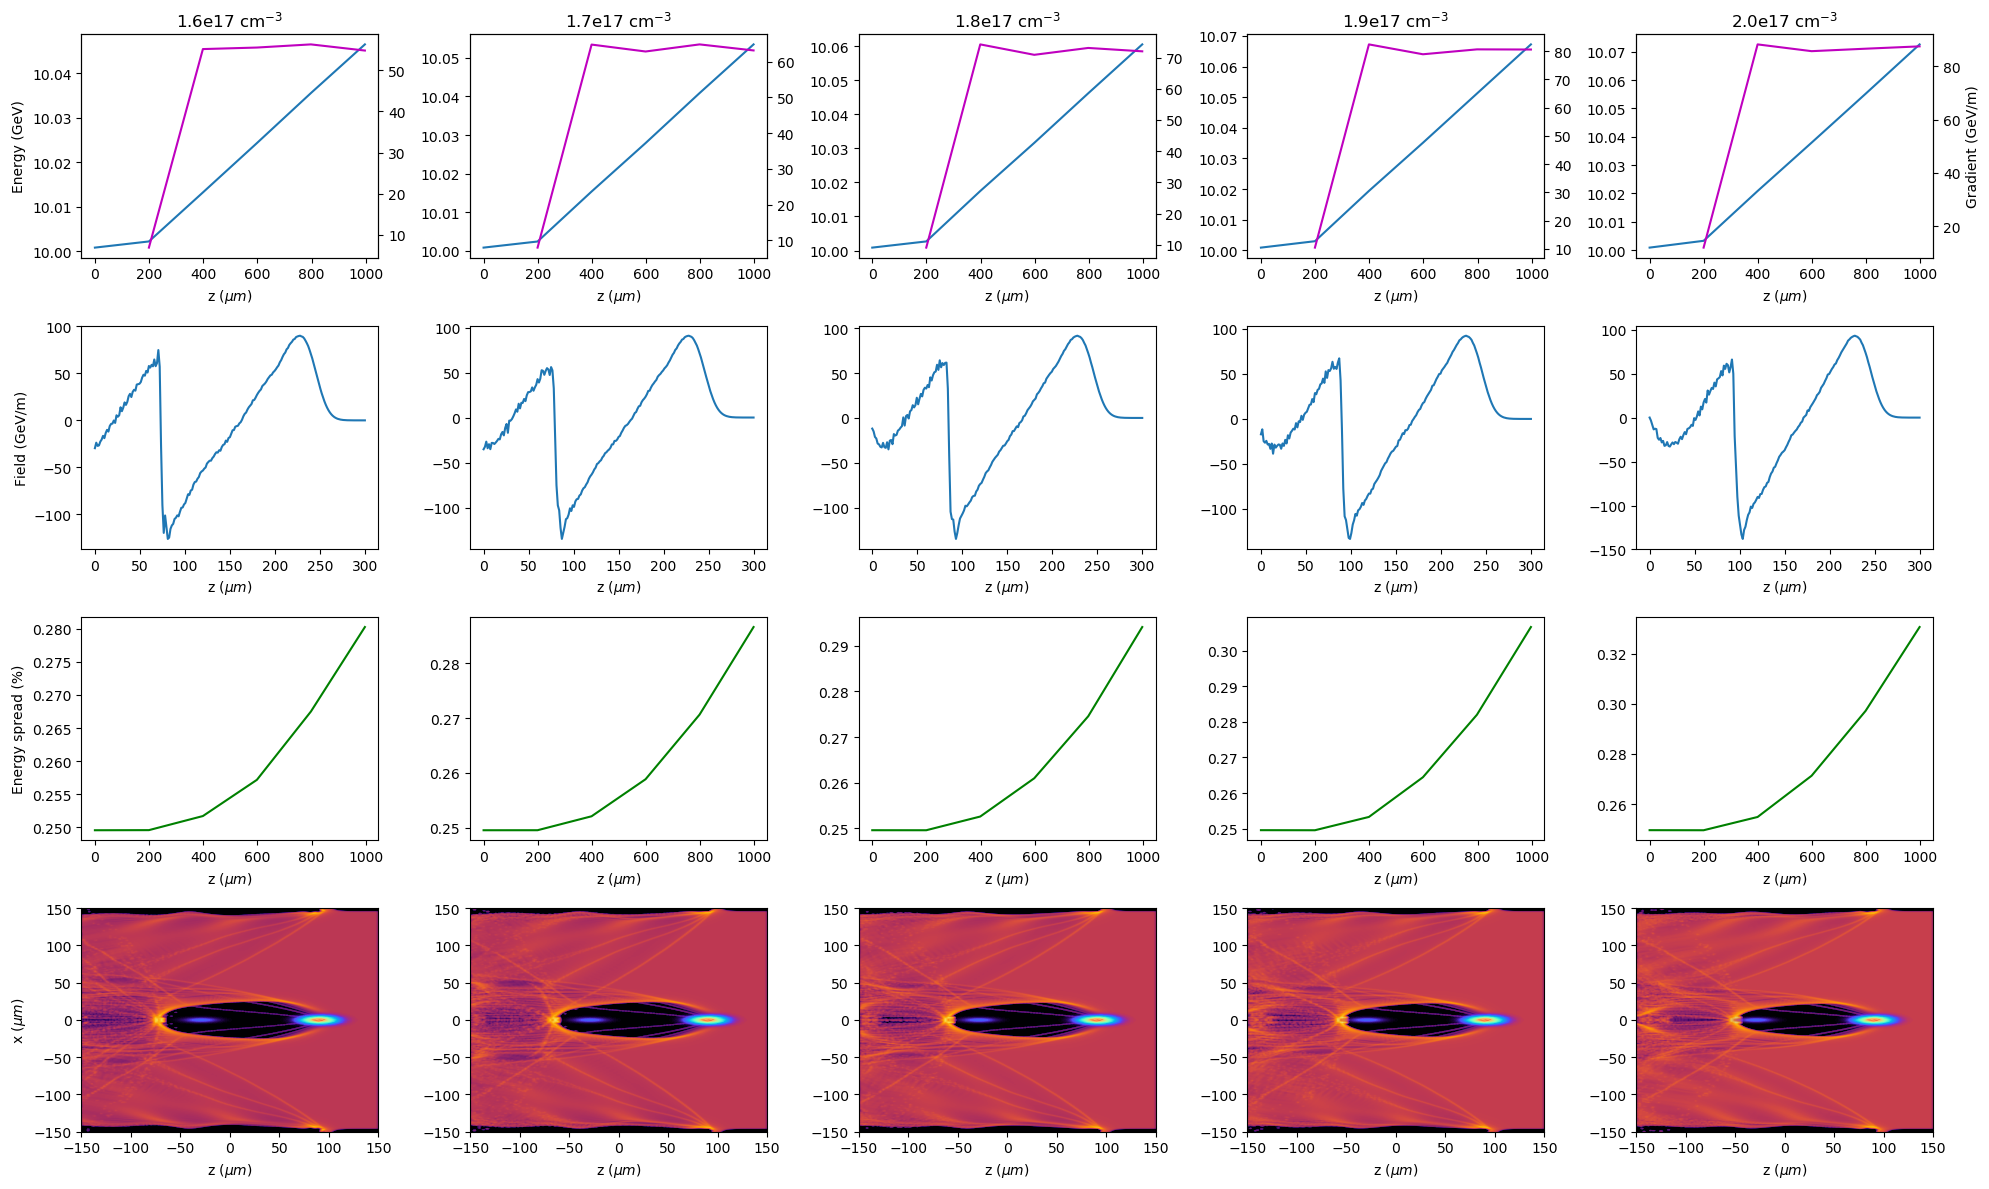

In [7]:
den = np.array([1.6, 1.7, 1.8, 1.9, 2.0])
plot_sim()

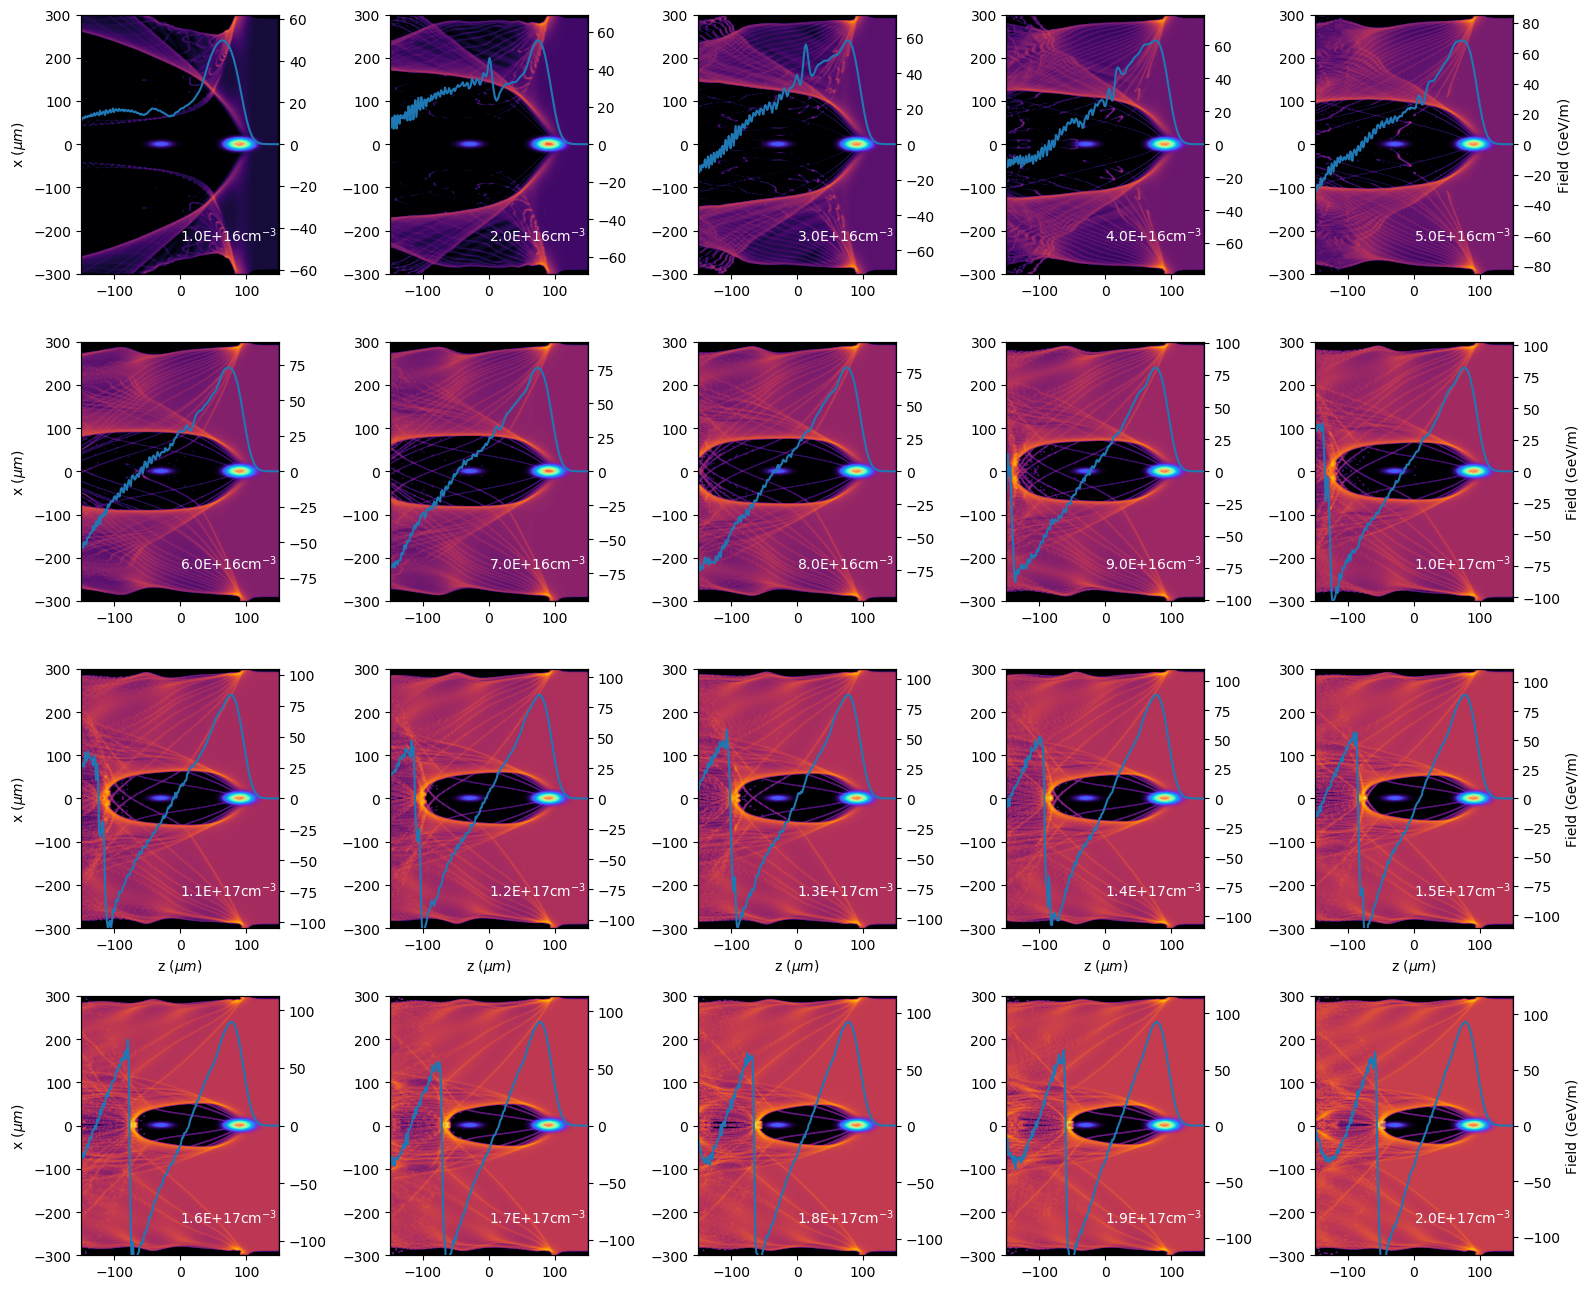

In [12]:
den = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])
plt.figure(figsize=(16,13), dpi=100)
gs = gridspec.GridSpec(4, 5)

for i in range(len(den)):
    path = pathPre + '%0.0fe16/' % (den[i]*10)
    if den[i] > 0.95:
        path = pathPre + '%0.1fe17/' % (den[i])
    data = np.load(path + 'AcceleratingGradient.npy', allow_pickle=True).item()
    density = np.load(path + 'DensitySlice.npy', allow_pickle=True).item()
    ind = len(density['rhoP'])-1
    rhoXY = -np.transpose(density['rhoP'][ind]/e/1e6)+1000 #+2 makes it greater than 0 for log scale
    x = density['xfield']
    y = density['yfield']
        
    #Load in the beam densities
    rhoBXY = -np.transpose(density['rhoB'][ind]/e/1e6)
    xb = (x[-1]-x[0])*1e6/2
    yb = (y[-1]-y[0])*1e6/2
    extent = [-xb, xb, -yb, yb]

    col = i % 5
    row = int(i/5)
    plt.subplot(gs[row, col])
    xplot = np.linspace(-xb, xb, len(x))
    plt.imshow(rhoXY, interpolation='gaussian', aspect='auto', extent=extent,
           norm=colors.LogNorm(vmin=5e15, vmax=5e18), cmap='inferno')
    cmapW = alpha_colormap(plt.cm.get_cmap('rainbow'), 0.1, True)
    plt.imshow(rhoBXY, interpolation='gaussian', aspect='auto', extent=extent, cmap=cmapW)
    if row == 2:
        plt.xlabel(r'z ($\mu m$)')
    if col == 0:
        plt.ylabel(r'x ($\mu m$)')
    plt.text(0, -0.75*yb, r'%0.1E$\mathrm{cm^{-3}}$' % (den[i]*1e17), color='w')
    plt.twinx()
    plt.plot(xplot, data['field'][5, :]/1e9)
    ymax = np.amax(data['field'][5, :]/1e9)
    plt.ylim(-1.25*ymax, 1.25*ymax)
    if col == 4:
        plt.ylabel(r'Field (GeV/m)')
    plt.xlim(-xb, xb)
plt.tight_layout()
plt.show()

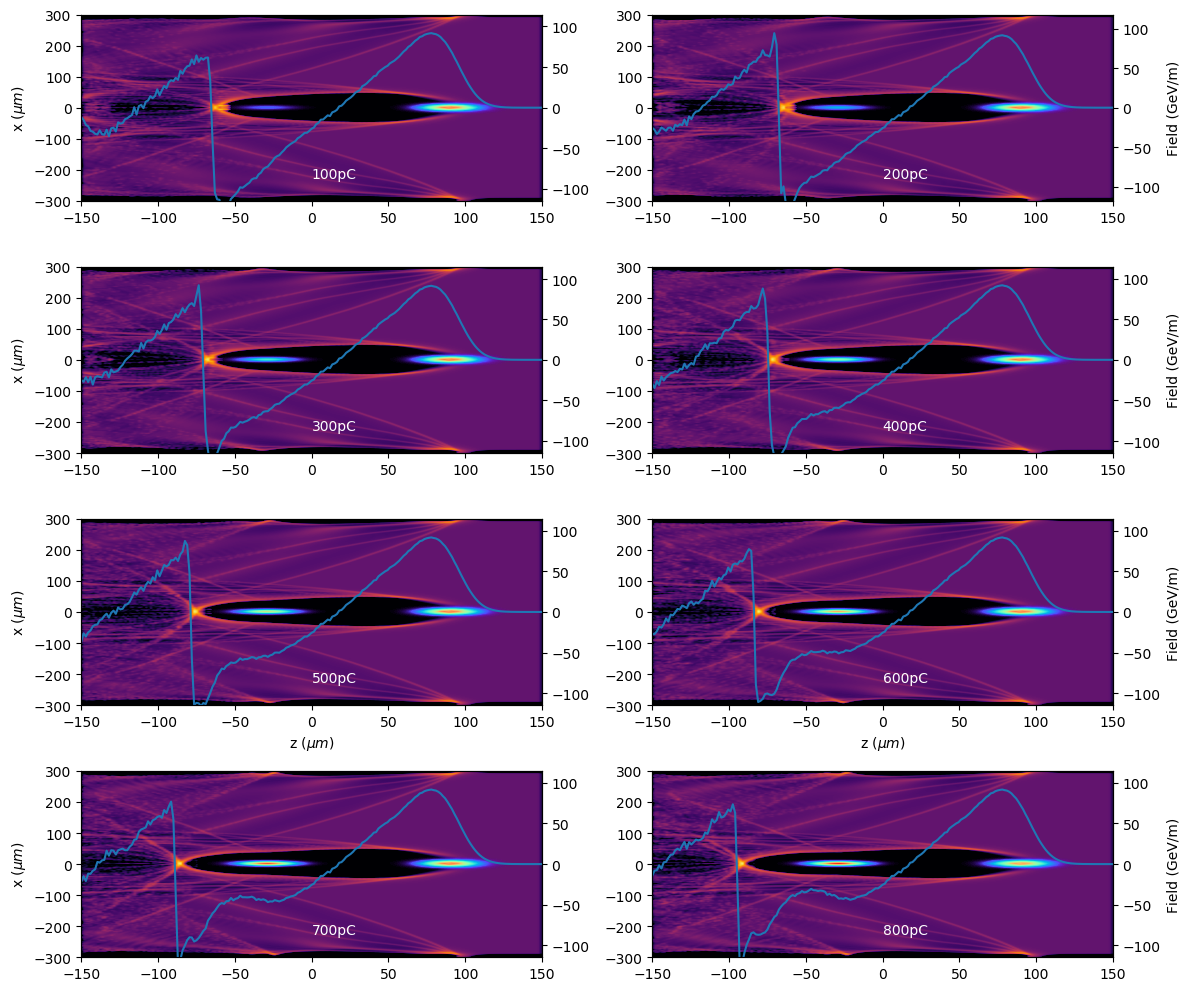

In [22]:
den = np.array([100, 200, 300, 400, 500, 600, 700, 800])
plt.figure(figsize=(12,10), dpi=100)
ncol = 2
gs = gridspec.GridSpec(4, ncol)

for i in range(len(den)):
    path = pathPre + '%0.0fpC/' % (den[i])
    data = np.load(path + 'AcceleratingGradient.npy', allow_pickle=True).item()
    density = np.load(path + 'DensitySlice.npy', allow_pickle=True).item()
    ind = len(density['rhoP'])-1
    rhoXY = -np.transpose(density['rhoP'][ind]/e/1e6)+1000 #+2 makes it greater than 0 for log scale
    x = density['xfield']
    y = density['yfield']
        
    #Load in the beam densities
    rhoBXY = -np.transpose(density['rhoB'][ind]/e/1e6)
    xb = (x[-1]-x[0])*1e6/2
    yb = (y[-1]-y[0])*1e6/2
    extent = [-xb, xb, -yb, yb]

    col = i % ncol
    row = int(i/ncol)
    plt.subplot(gs[row, col])
    xplot = np.linspace(-xb, xb, len(x))
    plt.imshow(rhoXY, interpolation='gaussian', aspect='auto', extent=extent,
           norm=colors.LogNorm(vmin=5e16, vmax=5e18), cmap='inferno')
    cmapW = alpha_colormap(plt.cm.get_cmap('rainbow'), 0.1, True)
    plt.imshow(rhoBXY, interpolation='gaussian', aspect='auto', extent=extent, cmap=cmapW)
    if row == 2:
        plt.xlabel(r'z ($\mu m$)')
    if col == 0:
        plt.ylabel(r'x ($\mu m$)')
    plt.text(0, -0.75*yb, r'%0.0fpC' % (den[i]), color='w')
    plt.twinx()
    plt.plot(xplot, data['field'][5, :]/1e9)
    ymax = np.amax(data['field'][5, :]/1e9)
    plt.ylim(-1.25*ymax, 1.25*ymax)
    if col == ncol-1:
        plt.ylabel(r'Field (GeV/m)')
    plt.xlim(-xb, xb)
plt.tight_layout()
plt.show()